## 数据集

对于课程教程，我们将使用一系列的数据集，以更好地展示算法的优势和劣势。这些数据集包括以下内容：

* Fisher's Iris: 每个项目代表一朵花，有四个尺寸：萼片和花瓣的长度和宽度。每个项目/花都被归入三个物种之一。Setosa、Versicolor和Virginica。

* Zoo: 该数据集持有不同的动物和它们的分类，如 "哺乳动物"、"鱼类 "等。我们要分类的新动物有以下测量值。1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 4, 1, 0, 1（不要关心这些测量值是什么意思）。

### 介绍

我们将使用的许多数据集是.csv文件（尽管也支持其他格式）。你可以在网上找到很多数据集，一个很好的数据集库是[UCI机器学习库]（https://archive.ics.uci.edu/ml/datasets.html）。

在这样的文件中，每一行都对应着一个项目/测量。一行中的每个单独的值代表一个*特征，通常还有一个值表示项目的*类别。

你可以在这里找到该数据集的代码：

In [1]:
import sys
sys.path.insert(1, '../')
from utils.utils import *
from utils.dataset4learners import *


psource(DataSet)

### 类属性

- **examples**。保存数据集的项目。每个项目都是一个值的列表。

- **attrs**: 特征的索引（默认范围是[0,f]，其中*f*是特征的数量）。例如，`item[i]`返回*item*的索引*i*处的特征。

- **attrnames**。一个包含属性名称的可选列表。例如，`item[s]`，其中*s*是一个特征名称，返回*item*中名称为*s*的特征。

- **target**。学习算法将尝试预测的属性。默认是最后一个属性。

- **inputs**: 这是不包含目标的属性列表。

- **values**: 一个列表，包含了相应属性/特征的可能值的集合。如果最初是 "无"，它将从例子中计算出来（通过函数 "setproblem"）。

- **distance**: 学习器中使用的距离函数，用于计算两个项目之间的距离。默认为`mean_boolean_error`。

- **name**: 数据集的名称。

- **source**: 数据集的来源（URL或其他）。在代码中不使用。

- **exclude**: 要从`inputs`中排除的索引列表。该列表可以包括属性索引（attrs）或名称（attrnames）。

### 类帮助函数

这些函数有助于根据你的需要修改`DataSet`对象。

- **sanitize**: 将一个例子作为输入，并在返回时将非输入（目标）属性替换为 "无"。对测试很有用。注意：给出的例子本身并没有被改动，而是返回一个经过处理的副本。

- **classes_to_numbers**: 将数据集的类名映射为数字。如果没有给出类名，它们将从数据集的值中计算出来。对于返回数值而不是字符串的分类器很有用。

- **remove_examples**: 删除包含一个给定值的例子。对于删除缺失值的例子，或者对于删除类（二元分类器需要）都很有用。

### 导入数据集

数据集可以用以下一行导入。

In [2]:
iris = DataSet(name="iris")

为了检查我们导入的数据集是否正确，我们可以做以下工作：

In [3]:
print(iris.examples[0])
print(iris.inputs)

[5.1, 3.5, 1.4, 0.2, 'setosa']
[0, 1, 2, 3]


它正确地打印了csv文件的第一行和属性索引的列表。

当导入一个数据集时，我们可以通过将参数`exclude`设置为属性索引或名称来指定排除某个属性（例如，在索引1处）。

In [4]:
iris2 = DataSet(name="iris",exclude=[1])
print(iris2.inputs)

[0, 2, 3]


### 属性

这里我们展示一下属性。

首先，我们将打印数据集中的前三个项目/例子。

In [5]:
print(iris.examples[:3])

[[5.1, 3.5, 1.4, 0.2, 'setosa'], [4.9, 3.0, 1.4, 0.2, 'setosa'], [4.7, 3.2, 1.3, 0.2, 'setosa']]


然后我们将打印 `attrs`, `attrnames`, `target`, `input`。注意`attrs`是如何持有[0,4]的值的，但是由于第四个属性是目标，`inputs`持有[0,3]的值。

In [6]:
print("attrs:", iris.attrs)
print("attrnames (by default same as attrs):", iris.attr_names)
print("target:", iris.target)
print("inputs:", iris.inputs)

attrs: [0, 1, 2, 3, 4]
attrnames (by default same as attrs): [0, 1, 2, 3, 4]
target: 4
inputs: [0, 1, 2, 3]


现在我们将打印第一个特征/属性的所有可能值。

In [7]:
print(iris.values[0])

[4.7, 5.5, 5.0, 4.9, 5.1, 4.6, 5.4, 4.4, 4.8, 4.3, 5.8, 7.0, 7.1, 4.5, 5.9, 5.6, 6.9, 6.5, 6.4, 6.6, 6.0, 6.1, 7.6, 7.4, 7.9, 5.7, 5.3, 5.2, 6.3, 6.7, 6.2, 6.8, 7.3, 7.2, 7.7]


最后我们将打印数据集的名称和来源。请记住，我们没有为数据集设置来源，所以在这种情况下它是空的。

In [8]:
print("name:", iris.name)
print("source:", iris.source)

name: iris
source: 


上述的一个有用的组合是`dataset.values[dataset.target]`，它返回目标的可能值。对于分类问题，这将返回所有可能的类。让我们来试试：

In [9]:
print(iris.values[iris.target])

['virginica', 'versicolor', 'setosa']


### 辅助函数

我们现在将看看在这个类中发现的辅助函数。

首先我们看一下`sanitize`函数，它将给定例子的非输入值设置为`None`。

在这种情况下，我们想隐藏第一个例子的类，所以我们将对其进行消毒处理。

注意，这个函数实际上并没有改变给定的例子；它返回一个经过处理的*副本*。

In [10]:
print("Sanitized:",iris.sanitize(iris.examples[0]))
print("Original:",iris.examples[0])

Sanitized: [5.1, 3.5, 1.4, 0.2]
Original: [5.1, 3.5, 1.4, 0.2, 'setosa']


目前 "iris "数据集有三个类，Setosa, virginica和versicolor。我们想把它转换成一个二元类数据集（一个有两个类的数据集）。我们要删除的类是 "virginica"。为了达到这个目的，我们将利用辅助函数`remove_examples`。

In [11]:
iris2 = DataSet(name="iris")

iris2.remove_examples("virginica")
print(iris2.values[iris2.target])

['versicolor', 'setosa']


我们也有`classes_to_numbers`。对于模块中的许多分类器（如神经网络），类应该有数字值。通过这个函数，我们将字符串类名映射为数字。

In [12]:
print("Class of first example:",iris2.examples[0][iris2.target])
iris2.classes_to_numbers()
print("Class of first example:",iris2.examples[0][iris2.target])

Class of first example: setosa
Class of first example: 0


正如你所看到的，"setosa "被映射到了0。

最后，我们看一下`find_means_and_deviations`。它找出每个类的特征的平均值和标准偏差。

In [13]:
means, deviations = iris.find_means_and_deviations()

print("Setosa feature means:", means["setosa"])
print("Versicolor mean for first feature:", means["versicolor"][0])

print("Setosa feature deviations:", deviations["setosa"])
print("Virginica deviation for second feature:",deviations["virginica"][1])

Setosa feature means: [5.006, 3.418, 1.464, 0.244]
Versicolor mean for first feature: 5.936
Setosa feature deviations: [0.3524896872134513, 0.38102439795469095, 0.17351115943644546, 0.10720950308167838]
Virginica deviation for second feature: 0.32249663817263746


## iris的可视化

由于我们将在这个笔记本中广泛使用iris数据集，下面我们提供一个可视化工具，帮助理解数据集，从而理解算法的工作原理。

我们使用`matplotlib`和`notebook.py`中的`show_iris`函数在三维空间中绘制数据集。该函数接受三个参数，*i*、*j*和*k*，它们是指iris特征，"萼片长度"、"萼片宽度"、"瓣片长度 "和 "瓣片宽度"（0到3）。默认情况下，我们显示前三个特征。

In [14]:
import matplotlib.pyplot as plt


def show_iris(i=0, j=1, k=2):
    """Plots the iris dataset in a 3D plot.
    The three axes are given by i, j and k,
    which correspond to three of the four iris features."""

    plt.rcParams.update(plt.rcParamsDefault)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    iris = DataSet(name="iris")
    buckets = iris.split_values_by_classes()

    features = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
    f1, f2, f3 = features[i], features[j], features[k]

    a_setosa = [v[i] for v in buckets["setosa"]]
    b_setosa = [v[j] for v in buckets["setosa"]]
    c_setosa = [v[k] for v in buckets["setosa"]]

    a_virginica = [v[i] for v in buckets["virginica"]]
    b_virginica = [v[j] for v in buckets["virginica"]]
    c_virginica = [v[k] for v in buckets["virginica"]]

    a_versicolor = [v[i] for v in buckets["versicolor"]]
    b_versicolor = [v[j] for v in buckets["versicolor"]]
    c_versicolor = [v[k] for v in buckets["versicolor"]]

    for c, m, sl, sw, pl in [('b', 's', a_setosa, b_setosa, c_setosa),
                             ('g', '^', a_virginica, b_virginica, c_virginica),
                             ('r', 'o', a_versicolor, b_versicolor, c_versicolor)]:
        ax.scatter(sl, sw, pl, c=c, marker=m)

    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    ax.set_zlabel(f3)

    plt.show()


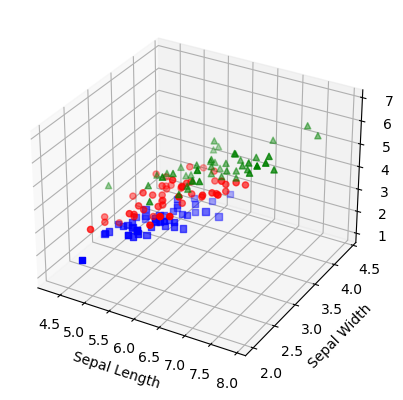

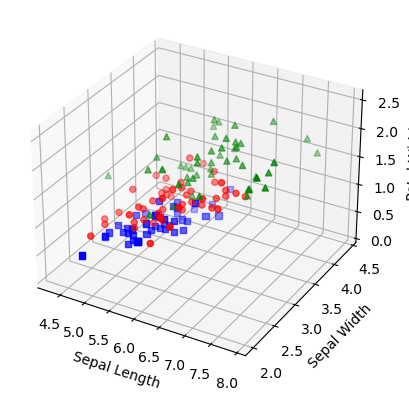

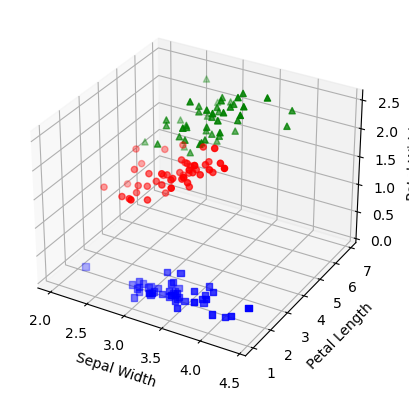

In [15]:
iris = DataSet(name="iris")

show_iris()
show_iris(0, 1, 3)
show_iris(1, 2, 3)

## 距离函数

在很多算法中（比如*k-Nearest Neighbors*算法），都需要对项目进行比较，找出它们的*相似度或*接近度。为此，我们有许多不同的函数供我们使用。以下是该模块中实现的函数。

### 曼哈顿距离 (`manhattan_distance`)

最简单的距离函数之一。它计算两个项目的坐标/特征之间的差异。为了理解它的工作原理，想象一个2D网格，坐标为*x*和*y*。在这个网格中，我们有两个项目，分别位于`(1,2)`和`(3,4)`的方格中。他们两个坐标之间的差是`3-1=2`和`4-2=2`。如果我们把这些加起来，就得到`4`。这意味着要从`(1,2)`到`(3,4)`我们需要四次移动；两次向右，两次向上。该函数对n维网格的工作原理与此类似。

In [16]:
def manhattan_distance(X, Y):
    return sum([abs(x - y) for x, y in zip(X, Y)])


distance = manhattan_distance([1,2], [3,4])
print("Manhattan Distance between (1,2) and (3,4) is", distance)

Manhattan Distance between (1,2) and (3,4) is 4


### 欧几里得距离 (`euclidean_distance`)

可能是最流行的距离函数。它返回两个项目中各个元素之间的平方差值的平方根。

In [17]:
def euclidean_distance(X, Y):
    return math.sqrt(sum([(x - y)**2 for x, y in zip(X,Y)]))


distance = euclidean_distance([1,2], [3,4])
print("Euclidean Distance between (1,2) and (3,4) is", distance)

Euclidean Distance between (1,2) and (3,4) is 2.8284271247461903


### Hamming Distance (`hamming_distance`)

这个函数计算两个项目中单个元素之间的差异数。例如，如果我们有两个二进制字符串 "111 "和 "011"，该函数将返回1，因为这两个字符串只有第一个元素不同。该函数对非二进制字符串也有同样的作用。

In [18]:
def hamming_distance(X, Y):
    return sum(x != y for x, y in zip(X, Y))


distance = hamming_distance(['a','b','c'], ['a','b','b'])
print("Hamming Distance between 'abc' and 'abb' is", distance)

Hamming Distance between 'abc' and 'abb' is 1


### 平均布尔误差（`mean_boolean_error`）。

为了计算这个距离，我们找到两个项目的所有元素中不同元素的比率。例如，如果两个项目是`(1,2,3)`和`(1,4,5)`，不同/所有元素的比率是2/3，因为它们在三个元素中的两个不同。

In [19]:
def mean_boolean_error(X, Y):
    return mean(int(x != y) for x, y in zip(X, Y))


distance = mean_boolean_error([1,2,3], [1,4,5])
print("Mean Boolean Error Distance between (1,2,3) and (1,4,5) is", distance)

Mean Boolean Error Distance between (1,2,3) and (1,4,5) is 0.6666666666666666


### 平均误差 (`mean_error`)

这个函数找出两个项目之间单个元素的平均差。例如，如果两个项目是`(1,0,5)`和`(3,10,5)`，它们的误差距离是`(3-1) + (10-0) + (5-5) = 2 + 10 + 0 = 12`。因此，平均误差距离是`12/3=4'。

In [20]:
def mean_error(X, Y):
    return mean([abs(x - y) for x, y in zip(X, Y)])


distance = mean_error([1,0,5], [3,10,5])
print("Mean Error Distance between (1,0,5) and (3,10,5) is", distance)

Mean Error Distance between (1,0,5) and (3,10,5) is 4


### 平均平方误差 (`ms_error`)

这与 "平均误差"非常相似，但我们不是计算元素之间的差异，而是计算差异的*平方*。

In [21]:
def ms_error(X, Y):
    return mean([(x - y)**2 for x, y in zip(X, Y)])


distance = ms_error([1,0,5], [3,10,5])
print("Mean Square Distance between (1,0,5) and (3,10,5) is", distance)

Mean Square Distance between (1,0,5) and (3,10,5) is 34.666666666666664


### 平均平方误差的根（`rms_error`）。

这是 "均方误差"的平方根。

In [22]:
def rms_error(X, Y):
    return math.sqrt(ms_error(X, Y))


distance = rms_error([1,0,5], [3,10,5])
print("Root of Mean Error Distance between (1,0,5) and (3,10,5) is", distance)

Root of Mean Error Distance between (1,0,5) and (3,10,5) is 5.887840577551898
